## Credit EDA Case Study

In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew 

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
%matplotlib inline
plt.style.use('bmh')

### Data Exploration

In [2]:
# Reading the data from local .csv files

app = pd.read_csv('application_data.csv')
pre = pd.read_csv('previous_application.csv')

In [3]:
# Checking if there's any misalignment in the header
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,-3648.00000,-2120,nan,1,1,0,1,1,0,Laborers,1.00000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08304,0.26295,0.13938,0.02470,0.03690,0.97220,0.61920,0.01430,0.00000,0.06900,0.08330,0.12500,0.03690,0.02020,0.01900,0.00000,0.00000,0.02520,0.03830,0.97220,0.63410,0.01440,0.00000,0.06900,0.08330,0.12500,0.03770,0.02200,0.01980,0.00000,0.00000,0.02500,0.03690,0.97220,0.62430,0.01440,0.00000,0.06900,0.08330,0.12500,0.03750,0.02050,0.01930,0.00000,0.00000,reg oper account,block of flats,0.01490,"Stone, brick",No,2.00000,2.00000,2.00000,2.00000,-1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,nan,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31127,0.62225,nan,0.09590,0.05290,0.98510,0.79600,0.06050,0.08000,0.03450,0.29170,0.33330,0.01300,0.07730,0.05490,0.00390,0.00980,0.09240,0.05380,0.98510,0.80400,0.04970,0.08060,0.03450,0.29170,0.33330,0.01280,0.07900,0.05540,0.00000,0.00000,0.09680,0.05290,0.98510,0.79870,0.06080,0.08000,0.03450,0.29170,0.33330,0.01320,0.07870,0.05580,0.00390,0.01000,reg oper account,block of flats,0.07140,Block,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / 

In [4]:
# Checking if there's any misalignment in the header
pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,Y,1,0.00000,0.18283,0.86734,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,nan,607500.00000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,nan,112500.00000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,nan,450000.00000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,nan,337500.00000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [5]:
# Checking the columns in the data frame

app.info(verbose = True, null_counts = True)
pre.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

#### Observations: 
Some features won't be relevant in exploratory analysis as there are much of missing values (such as OWN_CAR_AGE, COMMONAREA_MODE etc.)

In [6]:
# Determining the shape of the datset

app.shape

(307511, 122)

In [7]:
# Determining the shape of the datset

pre.shape

(1670214, 37)

### Data Cleaning

In [8]:
# Removing the unwanted columns from app

unwanted_app = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
       ]

app.drop(labels = unwanted_app, axis = 1, inplace = True)
app.shape

(307511, 79)

In [9]:
# Defin`=ing a function that drops the columns having more than 30% of missing values

def missing_val_30(df):
    missing_cols = df.isnull().sum() / len(df)
    missing_30 = missing_cols [missing_cols.values > 0.3 ]
    print("Number of columns with more than 30% of missing values: {}".format(len(missing_30)))
    # Removing those columns
    missing_list = list(missing_30.index)
    df.drop(labels = missing_list, axis = 1, inplace = True)
    print('\n')
    print("Columns dropped: {}".format(missing_list))

In [10]:
# Deleting the columns having more than 30% of missing values
missing_val_30(app)

Number of columns with more than 30% of missing values: 49


Columns dropped: ['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE

In [11]:
missing_val_30(pre)

Number of columns with more than 30% of missing values: 11


Columns dropped: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [12]:
# Removing the column values of 'XNA' and 'XAP'

pre=pre.drop(pre[pre['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre=pre.drop(pre[pre['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre=pre.drop(pre[pre['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

pre.shape

(69635, 26)

In [13]:
# Checking the shape of the data frame after dropping the columns

app.shape

(307511, 30)

In [14]:
# Checking the columns having less percentage of missing values

app.isnull().sum()/len(app)*100

SK_ID_CURR                    0.00000
TARGET                        0.00000
NAME_CONTRACT_TYPE            0.00000
CODE_GENDER                   0.00000
FLAG_OWN_CAR                  0.00000
FLAG_OWN_REALTY               0.00000
CNT_CHILDREN                  0.00000
AMT_INCOME_TOTAL              0.00000
AMT_CREDIT                    0.00000
AMT_ANNUITY                   0.00390
AMT_GOODS_PRICE               0.09040
NAME_TYPE_SUITE               0.42015
NAME_INCOME_TYPE              0.00000
NAME_EDUCATION_TYPE           0.00000
NAME_FAMILY_STATUS            0.00000
NAME_HOUSING_TYPE             0.00000
REGION_POPULATION_RELATIVE    0.00000
DAYS_BIRTH                    0.00000
DAYS_EMPLOYED                 0.00000
DAYS_REGISTRATION             0.00000
DAYS_ID_PUBLISH               0.00000
WEEKDAY_APPR_PROCESS_START    0.00000
HOUR_APPR_PROCESS_START       0.00000
REG_REGION_NOT_LIVE_REGION    0.00000
REG_REGION_NOT_WORK_REGION    0.00000
LIVE_REGION_NOT_WORK_REGION   0.00000
REG_CITY_NOT

#### Observations:

The columns 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE' are having few missing valuse. So imputing looks like a better option.


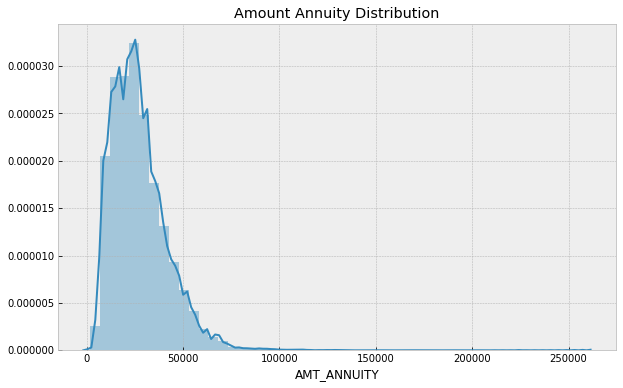

count   307499.00000
mean     27108.57391
std      14493.73732
min       1615.50000
25%      16524.00000
50%      24903.00000
75%      34596.00000
max     258025.50000
Name: AMT_ANNUITY, dtype: float64

In [15]:
# Checking the AMT_ANNUITY column

fig = plt.figure(figsize = (10,6))
sns.distplot(app.AMT_ANNUITY)
plt.title("Amount Annuity Distribution")
plt.show()
# Checking summary statistics

app.AMT_ANNUITY.describe()


#### Observations

AMT_ANNUITY is right skewed since it has outliers. So imputiing the missing values with median seems like an ideal choice

In [16]:
# imputing AMT_ANNUITY with median
filler = app['AMT_ANNUITY'].median()
app.AMT_ANNUITY.fillna(filler, inplace = True)
print("No. of missing values after imputing: {}".format(app.AMT_ANNUITY.isnull().sum()))
app.AMT_ANNUITY.describe()

No. of missing values after imputing: 0


count   307511.00000
mean     27108.48784
std      14493.46107
min       1615.50000
25%      16524.00000
50%      24903.00000
75%      34596.00000
max     258025.50000
Name: AMT_ANNUITY, dtype: float64

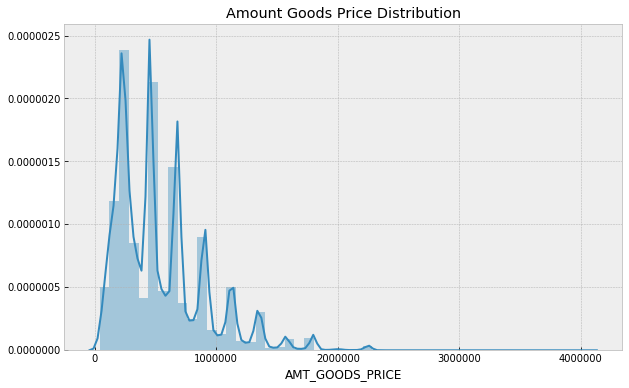

count    307233.00000
mean     538396.20743
std      369446.46054
min       40500.00000
25%      238500.00000
50%      450000.00000
75%      679500.00000
max     4050000.00000
Name: AMT_GOODS_PRICE, dtype: float64

In [17]:
# Checking the AMT_GOODS_PRICE column

fig = plt.figure(figsize = (10,6))
sns.distplot(app.AMT_GOODS_PRICE)
plt.title("Amount Goods Price Distribution")
plt.show()
# Checking summary statistics

app.AMT_GOODS_PRICE.describe()

#### Observations

AMT_GOODS_PRICE is right skewed since it has outliers. So imputiing the missing values with median seems like an ideal choice

In [18]:
# imputing AMT_ANNUITY with median
filler = app['AMT_GOODS_PRICE'].median()
app.AMT_GOODS_PRICE.fillna(filler, inplace = True)
print("No. of missing values after imputing: {}".format(app.AMT_GOODS_PRICE.isnull().sum()))
app.AMT_GOODS_PRICE.describe()

No. of missing values after imputing: 0


count    307511.00000
mean     538316.29437
std      369288.98225
min       40500.00000
25%      238500.00000
50%      450000.00000
75%      679500.00000
max     4050000.00000
Name: AMT_GOODS_PRICE, dtype: float64

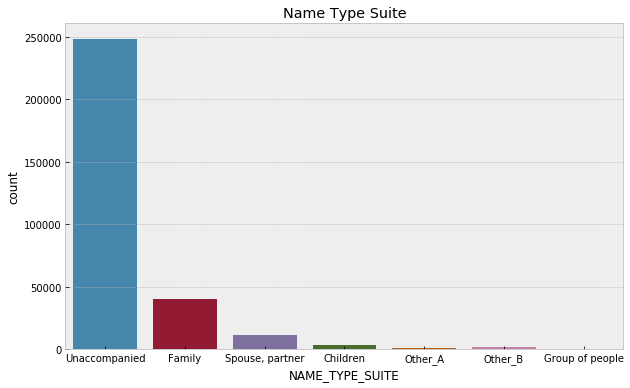

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [19]:
# Checking the NAME_TYPE_SUITE column

fig = plt.figure(figsize = (10,6))
sns.countplot(app.NAME_TYPE_SUITE)
plt.title("Name Type Suite")
plt.show()
# Checking summary statistics

app.NAME_TYPE_SUITE.describe()

#### Observations

NAME_TYPE_SUITE is categorical column and it has missing values. So imputiing the missing values with mode seems like an ideal choice

In [20]:
# imputing NAME_TYPE_SUITE with mode
filler = app['NAME_TYPE_SUITE'].mode()[0]
app.NAME_TYPE_SUITE.fillna(filler, inplace = True)
print("No. of missing values after imputing: {}".format(app.NAME_TYPE_SUITE.isnull().sum()))
app.NAME_TYPE_SUITE.describe()

No. of missing values after imputing: 0


count            307511
unique                7
top       Unaccompanied
freq             249818
Name: NAME_TYPE_SUITE, dtype: object

In [21]:
# Checking the datatypes in the data frame

list(set(app.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [22]:
# Checking the numeric columns in the data frame

app_num = app.select_dtypes(include = ['float64', 'int64'])
app_num.shape

(307511, 19)

In [23]:
# Checking the categorical columns in the data frame

app_cat = app.select_dtypes(include = ['O'])
app_cat.shape

(307511, 11)

In [24]:
# Checking the categorical columns in the data frame

categorical_columns = app.select_dtypes(include = ['O']).columns.tolist()
app[categorical_columns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion


In [25]:
# Checking the XNA values in data frame

XNA_List = []
for i in categorical_columns:
    if sum(app[i] == 'XNA') >= 1:
        XNA_List.append(i)
print(XNA_List)        

['CODE_GENDER', 'ORGANIZATION_TYPE']


#### Observations

Some rows are capped with 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [26]:
# Imputing XNA values

for i in XNA_List:
    print('\n')
    print("Before Imputation on {}: ".format(i))
    print(app[i].value_counts())
    app.loc[app[i]=='XNA',i] = app[i].mode()[0]
    print('\n')
    print("After Imputation on {}: ".format(i))
    print(app[i].value_counts())



Before Imputation on CODE_GENDER: 
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


After Imputation on CODE_GENDER: 
F    202452
M    105059
Name: CODE_GENDER, dtype: int64


Before Imputation on ORGANIZATION_TYPE: 
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2 

In [27]:
# Casting all variable into numeric in the dataset

numeric_columns = app.select_dtypes(include = ['float64', 'int64']).columns.to_list()
app[numeric_columns].head()
app[numeric_columns] = app[numeric_columns].apply(pd.to_numeric)
app[numeric_columns].head(5)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,100002,1,0,202500.00000,406597.50000,24700.50000,351000.00000,0.01880,-9461,-637,-3648.00000,-2120,10,0,0,0,0,0,0
1,100003,0,0,270000.00000,1293502.50000,35698.50000,1129500.00000,0.00354,-16765,-1188,-1186.00000,-291,11,0,0,0,0,0,0
2,100004,0,0,67500.00000,135000.00000,6750.00000,135000.00000,0.01003,-19046,-225,-4260.00000,-2531,9,0,0,0,0,0,0
3,100006,0,0,135000.00000,312682.50000,29686.50000,297000.00000,0.00802,-19005,-3039,-9833.00000,-2437,17,0,0,0,0,0,0
4,100007,0,0,121500.00000,513000.00000,21865.50000,513000.00000,0.02866,-19932,-3038,-4311.00000,-3458,11,0,0,0,0,1,1


### Data Analysis

#### Observation

The Imbalance ratio is 11.39

In [28]:
# Grouping the income into various groups 

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
label = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app['AMT_INCOME_RANGE']=pd.cut(app['AMT_INCOME_TOTAL'],bins,labels = label)

In [29]:
# Grouping the Credit Amount into various groups 

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
label = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app['AMT_CREDIT_RANGE']=pd.cut(app['AMT_CREDIT'],bins=bins,labels=label)

In [30]:
# Splitting the dataframes based on the target column 'TARGET' 

target0_df = app.loc[app["TARGET"]==0]
target1_df = app.loc[app["TARGET"]==1]

In [31]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

11.39

#### Univariate analysis on categorical features

#### 1. Analysis on TARGET = 0 (Non Defaulters)

In [32]:
# Observing categorial columns

categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [33]:
# Count plotting in logarithmic scale

def cat_count(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts(sort = True).index,hue = hue) 
        
    plt.show()

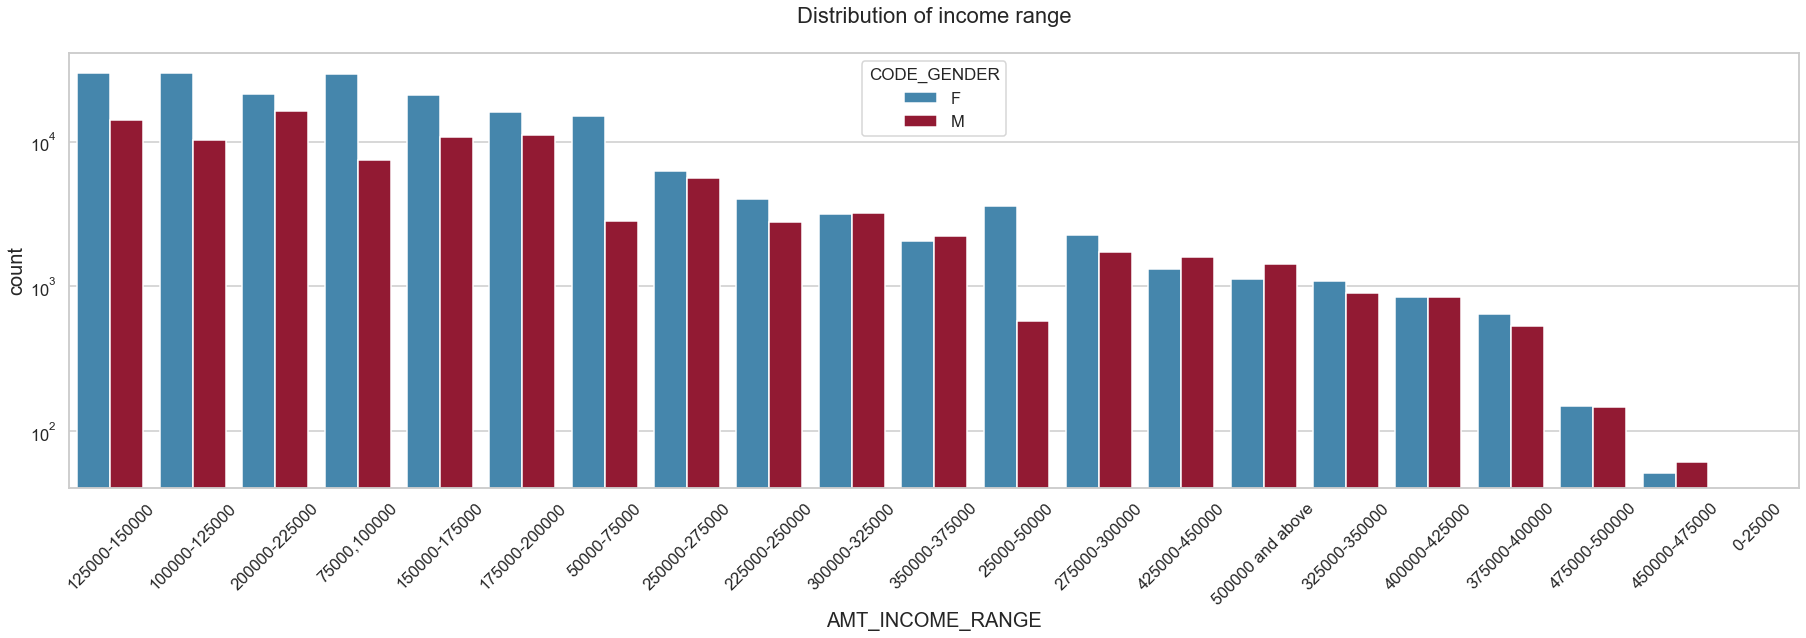

In [34]:
# PLotting for income range

cat_count(target0_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

#### Observations

1. On an average Female frequency is higher than male.
2. 0-25000 range has almost zero credits.
3. Income range from 75000 to 200000 has most number of credits. 
4. Very less count/credits for the income range 400000 and above.

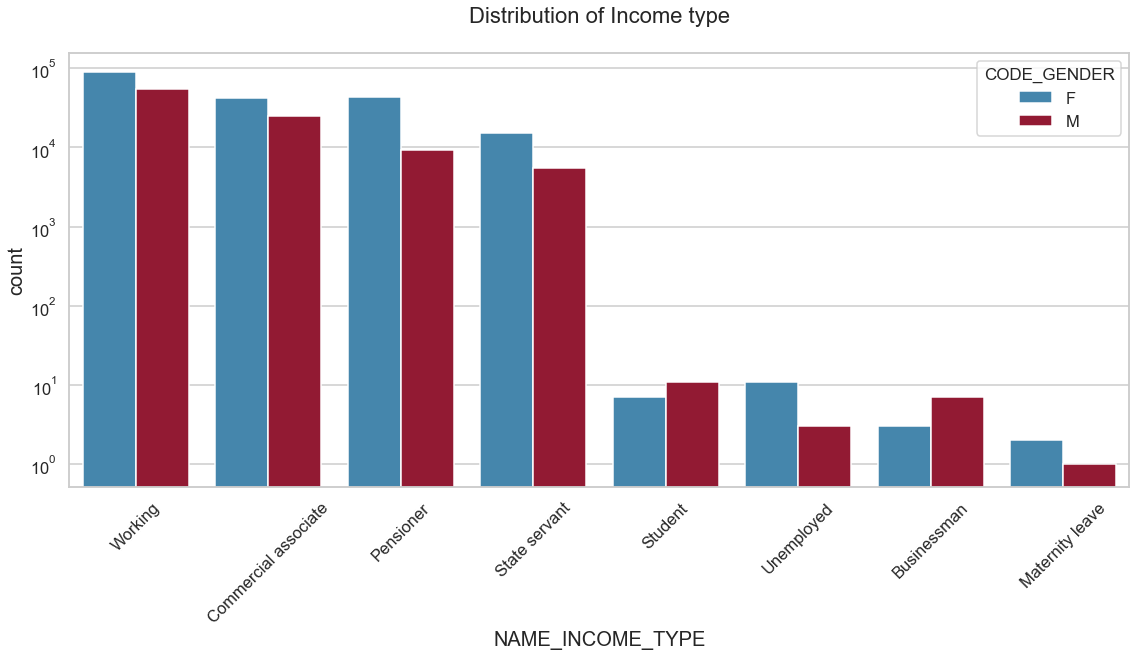

In [35]:
# Plotting for Income type
cat_count(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

#### Observations

1. For income type ‘working’, ’commercial associate’, 'pensioner' and ‘State Servant’ the number of credits are higher than others.
2. On an average the frequency of female is more than male.
3. Less number of credits for income type ‘Maternity leave’, ‘Businessman’, 'Student' and ‘Unemployed'.

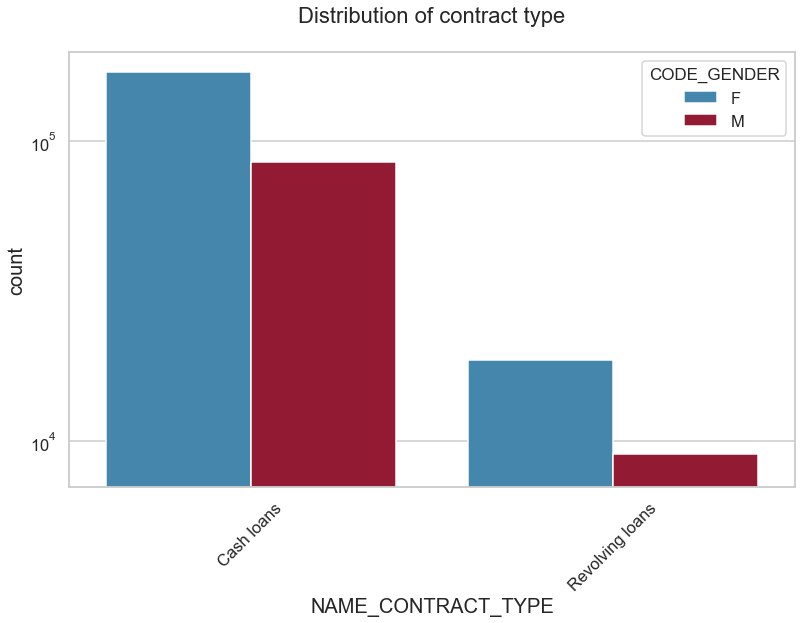

In [36]:
# Plotting for Contract type

cat_count(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

#### Observations
1. ‘Cash loans’ have higher number of credits than ‘Revolving loans’.
2. Female frequency is more than male.

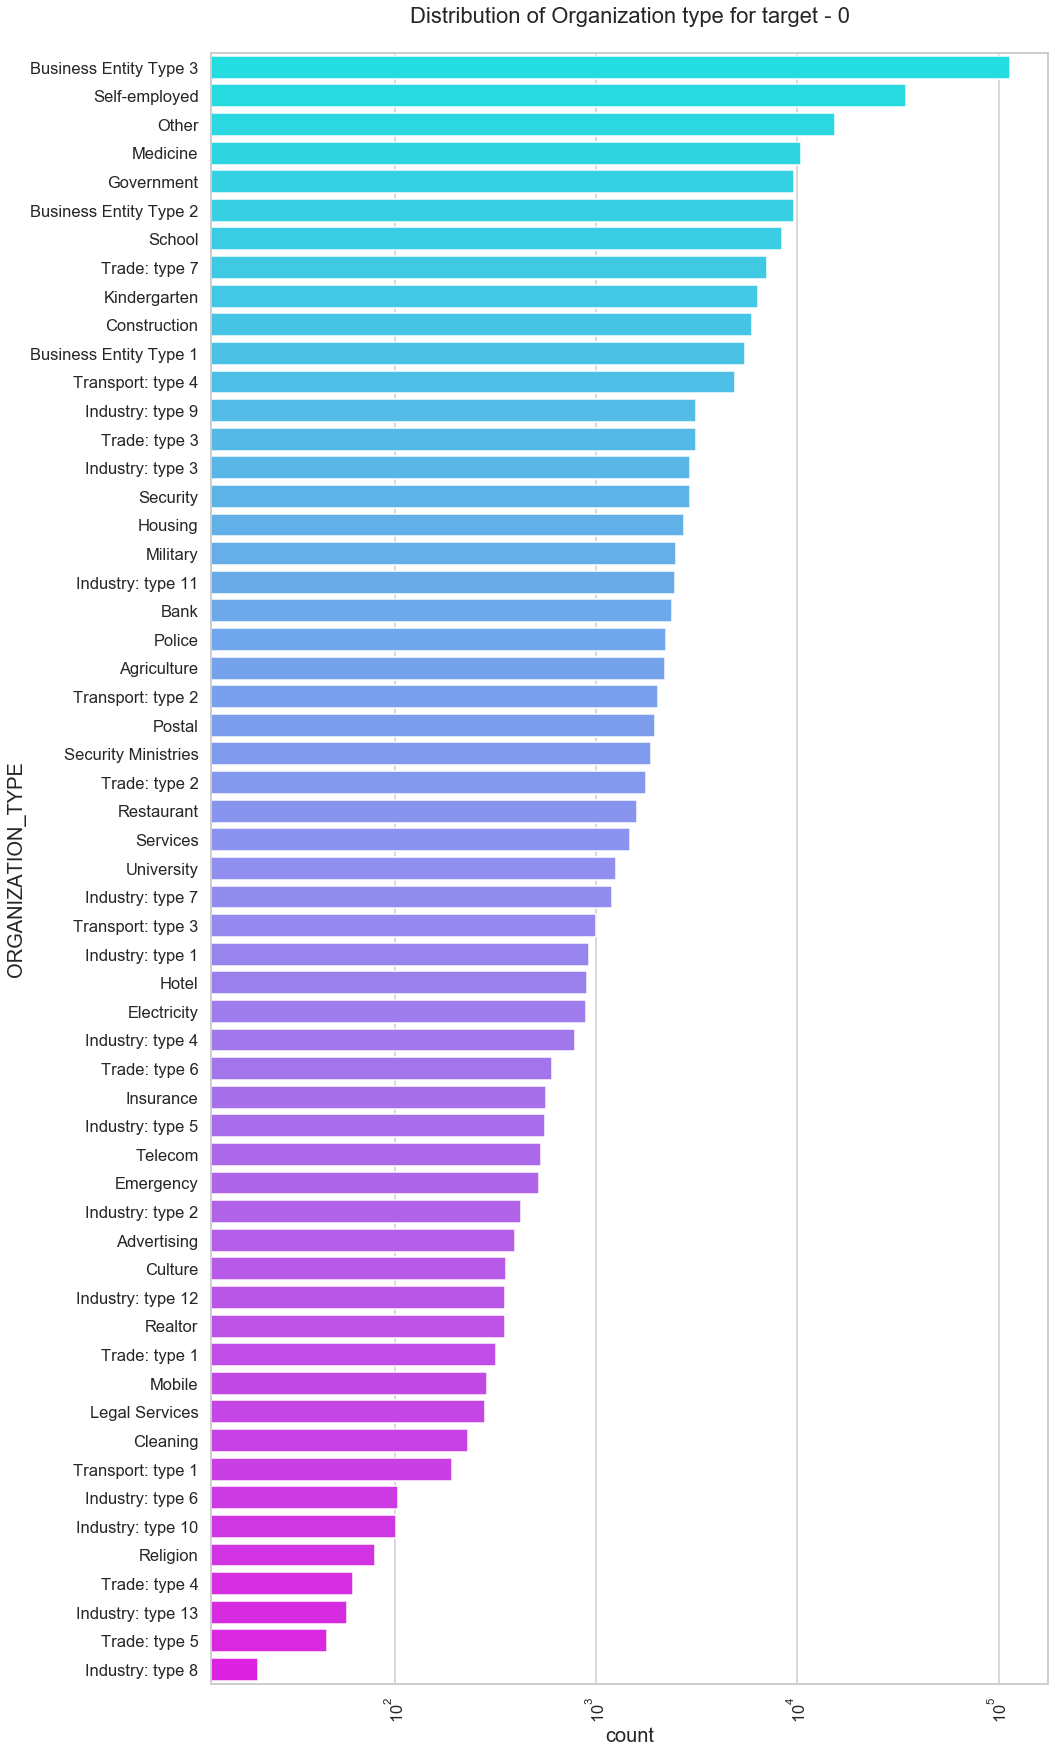

In [37]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

#### Observations
1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
2. Clients for less credits are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

#### 2. Analysis on TARGET = 1 (Defaulters)

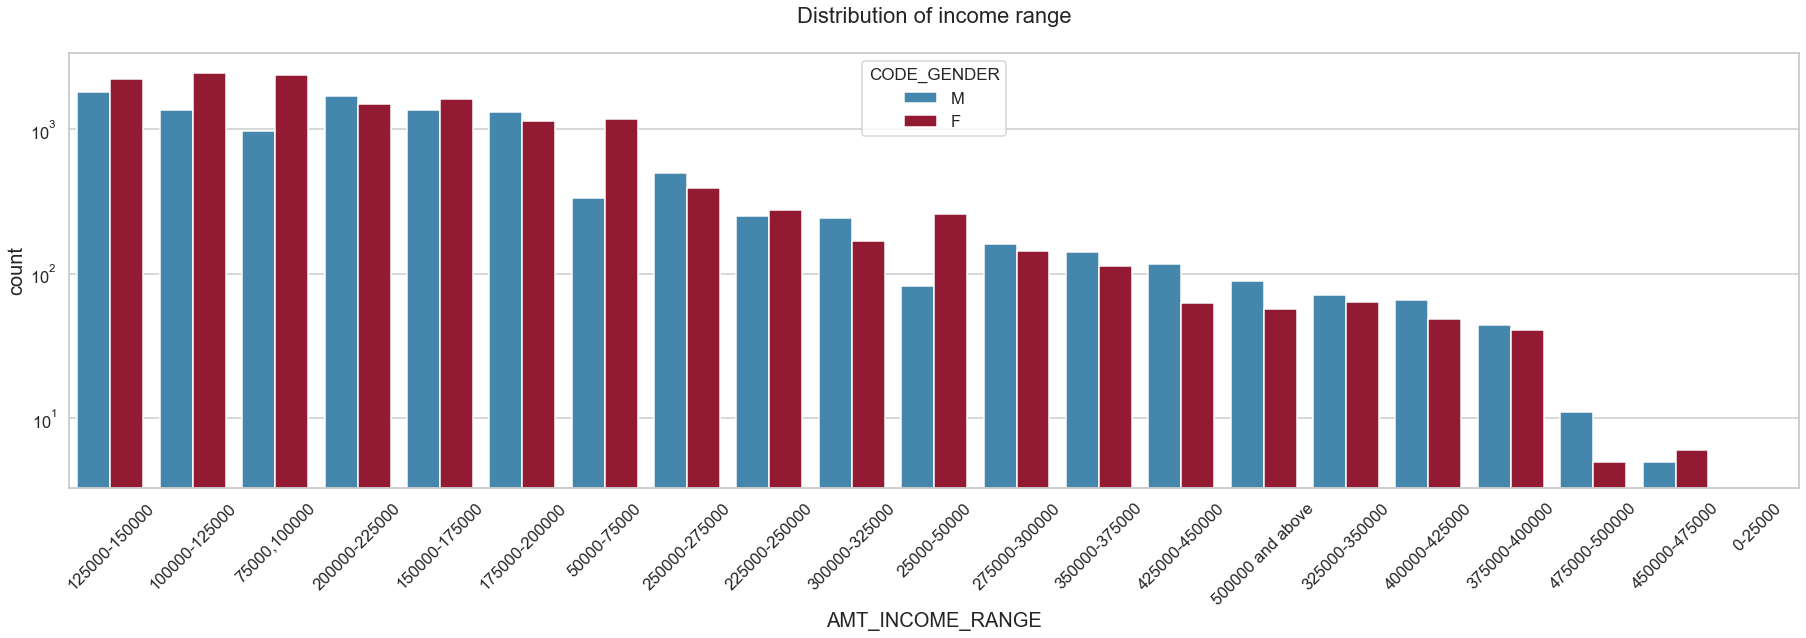

In [38]:
# PLotting for income range

cat_count(target1_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

#### Observations
1. Male defaulters are higher than female.
2. Income range from 75000 to 125000 is having more number of defaulters.
3. Very less number of defaulters for income range 400000 and above.

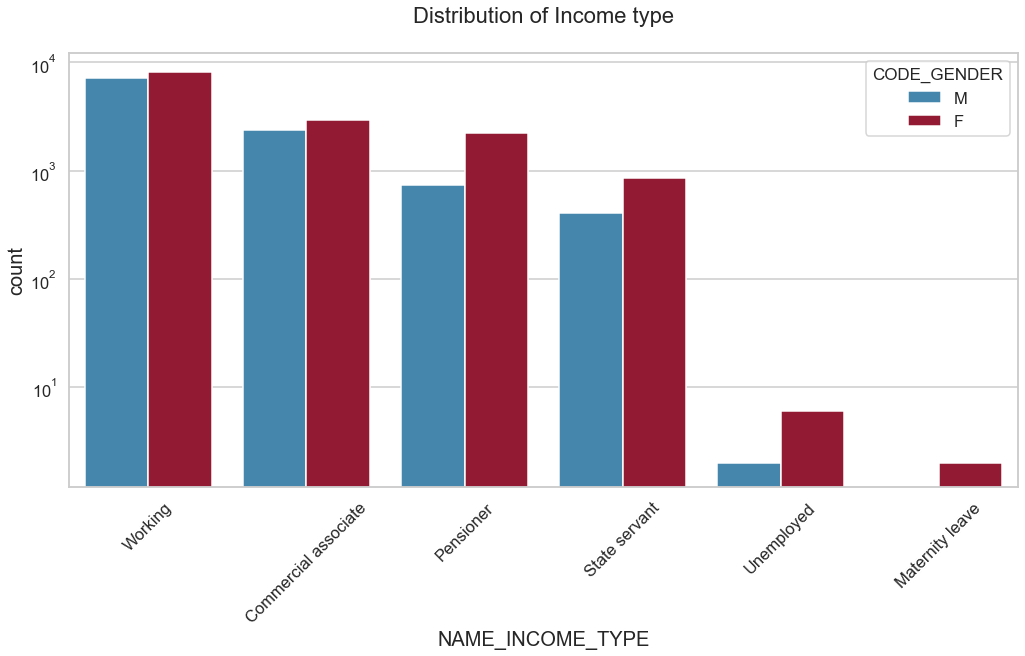

In [39]:
# Plotting for Income type

cat_count(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

#### Observations
1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of defaulters are higher.
2. In this plot Females are having more number of credits than male.
3. Less number of credits for income type ‘Maternity leave’.
4. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

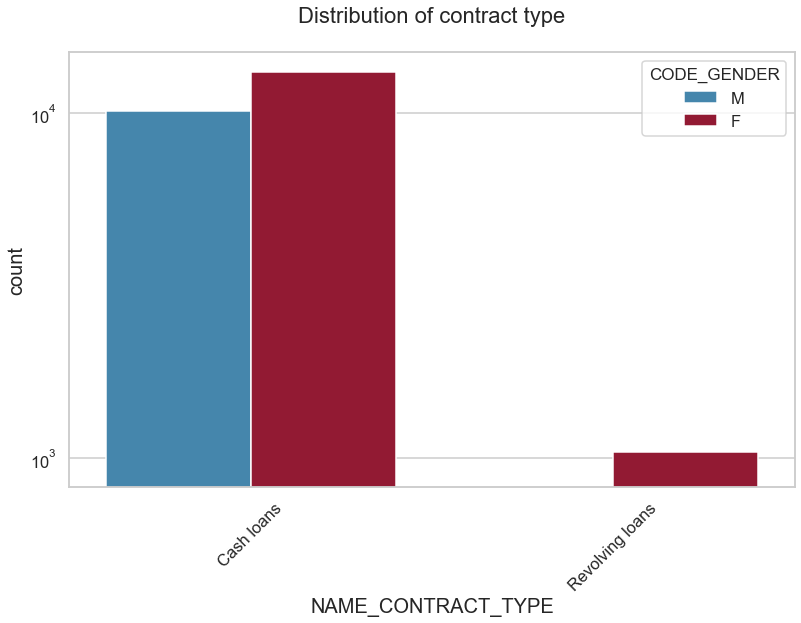

In [40]:
# Plotting afor Contract type

cat_count(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

#### Observations
1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 : there is only Female Revolving loans.

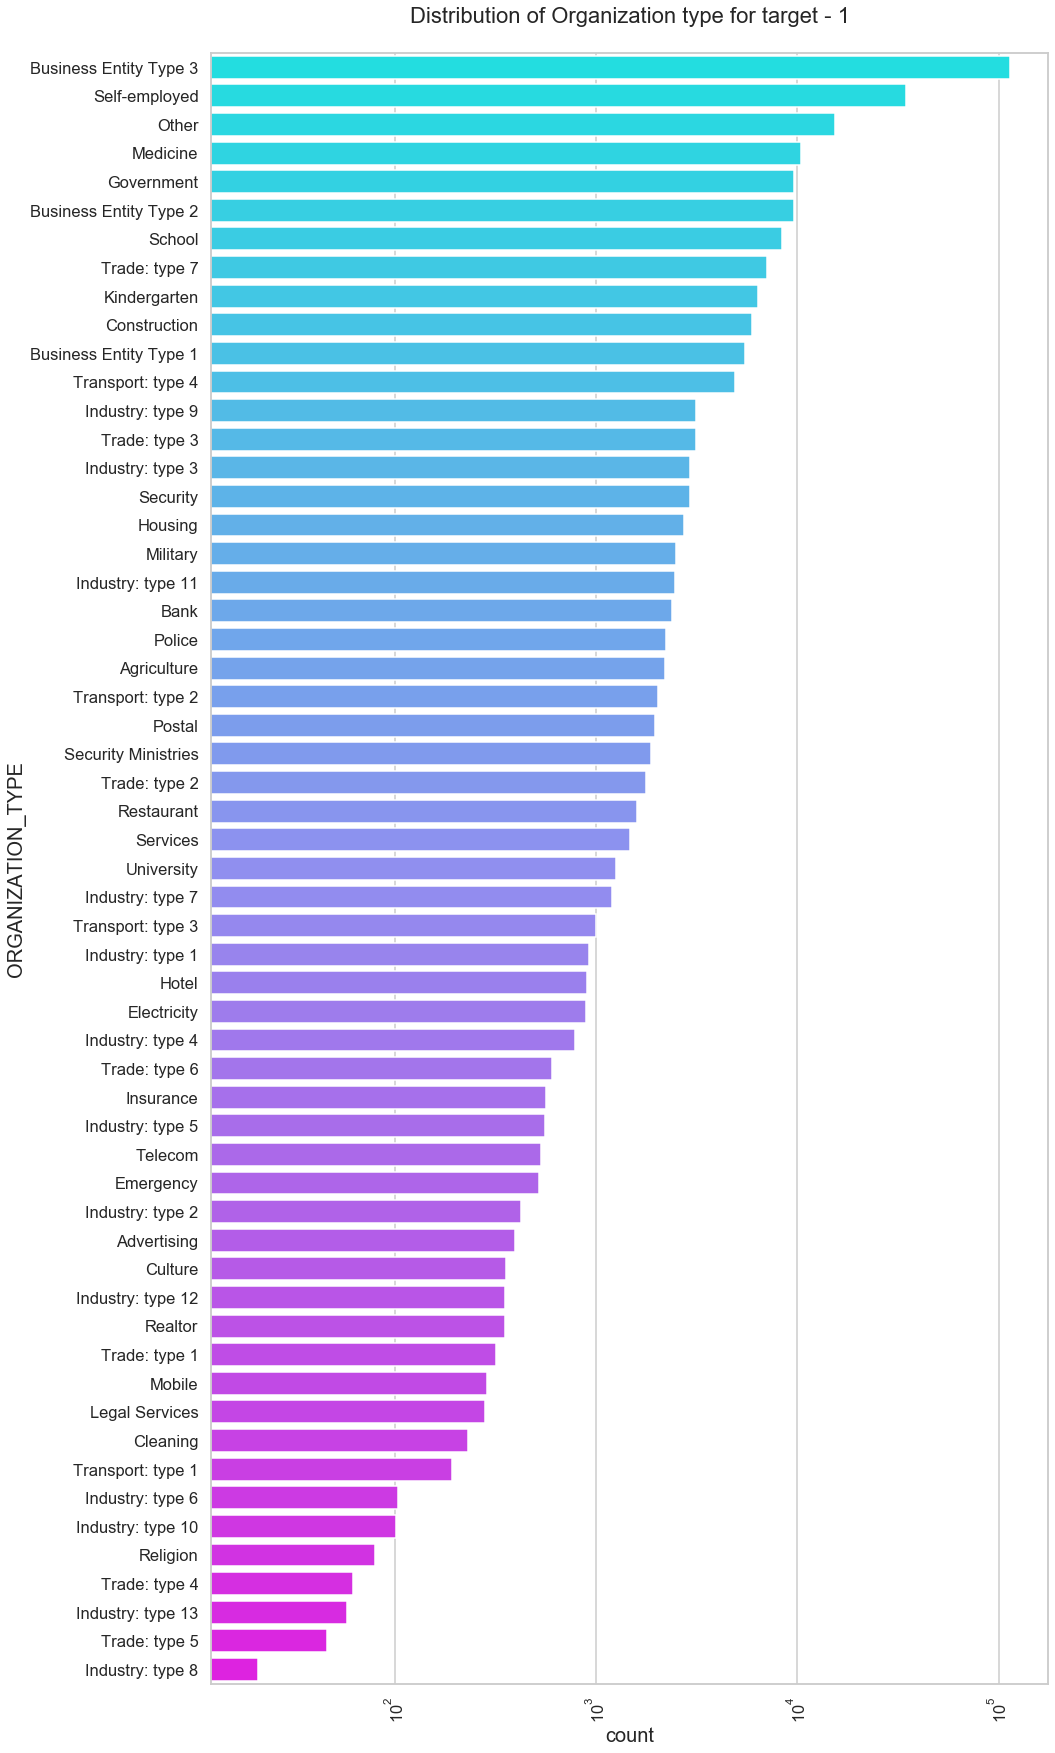

In [41]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

#### Observations
1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
3. Same as type 0 in distribution of organization type.

In [42]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0_corr=target0_corr.corr(method='spearman')
target1_corr=target1_corr.corr(method='spearman')

In [43]:
# Correlation for target 0

target0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.00000,0.03831,0.00232,0.02477,-0.00132,-0.02555,0.37564,-0.16123,0.18052,-0.01999,0.00172,-0.01074,0.01546,0.02152,0.02779,0.07621,0.07159
AMT_INCOME_TOTAL,0.03831,1.00000,0.41602,0.48569,0.41972,0.09777,0.09351,-0.17454,0.07639,0.03593,0.10238,0.07837,0.16144,0.14898,0.02037,0.04009,0.04032
AMT_CREDIT,0.00232,0.41602,1.00000,0.83189,0.98500,0.05357,-0.05715,-0.12040,0.00942,-0.00198,0.05137,0.01909,0.04543,0.04774,-0.02665,-0.01266,0.00697
AMT_ANNUITY,0.02477,0.48569,0.83189,1.00000,0.82980,0.05859,0.01174,-0.12977,0.03772,0.01657,0.05419,0.03582,0.07577,0.07304,-0.00496,0.00972,0.01945
AMT_GOODS_PRICE,-0.00132,0.41972,0.98500,0.82980,1.00000,0.06263,-0.05834,-0.12216,0.00950,-0.00404,0.05886,0.02040,0.04637,0.04804,-0.02815,-0.01547,0.00467
REGION_POPULATION_RELATIVE,-0.02555,0.09777,0.05357,0.05859,0.06263,1.00000,-0.03073,-0.00258,-0.03668,-0.01046,0.12824,-0.01992,0.02921,0.05119,-0.04555,-0.02935,-0.00548
DAYS_BIRTH,0.37564,0.09351,-0.05715,0.01174,-0.05834,-0.03073,1.00000,-0.23417,0.29813,0.26198,0.09844,0.06638,0.09642,0.07007,0.18095,0.23911,0.15659
DAYS_EMPLOYED,-0.16123,-0.17454,-0.12040,-0.12977,-0.12216,-0.00258,-0.23417,1.00000,-0.03730,-0.11762,-0.04910,0.02175,-0.01035,-0.01950,0.02243,-0.08323,-0.09868
DAYS_REGISTRATION,0.18052,0.07639,0.00942,0.03772,0.00950,-0.03668,0.29813,-0.03730,1.00000,0.09415,-0.00847,0.02594,0.03272,0.02416,0.05531,0.08587,0.06244
DAYS_ID_PUBLISH,-0.01999,0.03593,-0.00198,0.01657,-0.00404,-0.01046,0.26198,-0.11762,0.09415,1.00000,0.03976,0.03539,0.04919,0.03478,0.07736,0.10105,0.06298


In [44]:

# Correlation for target 1

target1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.00000,-0.00475,0.00020,0.03368,-0.00756,-0.03163,0.26786,-0.11633,0.13366,-0.02732,-0.02247,-0.02582,-0.01957,-0.00982,0.00413,0.04749,0.05135
AMT_INCOME_TOTAL,-0.00475,1.00000,0.35928,0.43162,0.36248,0.05146,-0.00724,-0.11776,0.03667,-0.00593,0.08817,0.07645,0.15605,0.14497,0.00900,0.02799,0.03086
AMT_CREDIT,0.00020,0.35928,1.00000,0.81144,0.97643,0.03992,-0.15522,-0.08360,-0.01710,-0.05378,0.02854,0.01419,0.03033,0.03256,-0.02854,-0.02957,-0.01118
AMT_ANNUITY,0.03368,0.43162,0.81144,1.00000,0.80410,0.02330,-0.03048,-0.09659,0.03590,-0.01447,0.03208,0.03093,0.06388,0.06237,-0.00285,0.00740,0.01492
AMT_GOODS_PRICE,-0.00756,0.36248,0.97643,0.80410,1.00000,0.05409,-0.15771,-0.08618,-0.01918,-0.05971,0.04002,0.01697,0.03371,0.03497,-0.03020,-0.03254,-0.01254
REGION_POPULATION_RELATIVE,-0.03163,0.05146,0.03992,0.02330,0.05409,1.00000,-0.04640,-0.00363,-0.03431,-0.02367,0.10599,-0.03247,-0.00901,0.01062,-0.05708,-0.04433,-0.01645
DAYS_BIRTH,0.26786,-0.00724,-0.15522,-0.03048,-0.15771,-0.04640,1.00000,-0.10717,0.23294,0.25163,0.06581,0.05583,0.06454,0.03991,0.16537,0.20341,0.10897
DAYS_EMPLOYED,-0.11633,-0.11776,-0.08360,-0.09659,-0.08618,-0.00363,-0.10717,1.00000,-0.01772,-0.04980,-0.02725,0.03703,0.01683,0.00215,0.04657,-0.02566,-0.05533
DAYS_REGISTRATION,0.13366,0.03667,-0.01710,0.03590,-0.01918,-0.03431,0.23294,-0.01772,1.00000,0.09575,-0.03202,0.01524,0.01432,0.01036,0.03389,0.07132,0.05275
DAYS_ID_PUBLISH,-0.02732,-0.00593,-0.05378,-0.01447,-0.05971,-0.02367,0.25163,-0.04980,0.09575,1.00000,0.02635,0.03265,0.03284,0.01997,0.06861,0.07087,0.03141


In [45]:
# Plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="coolwarm",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

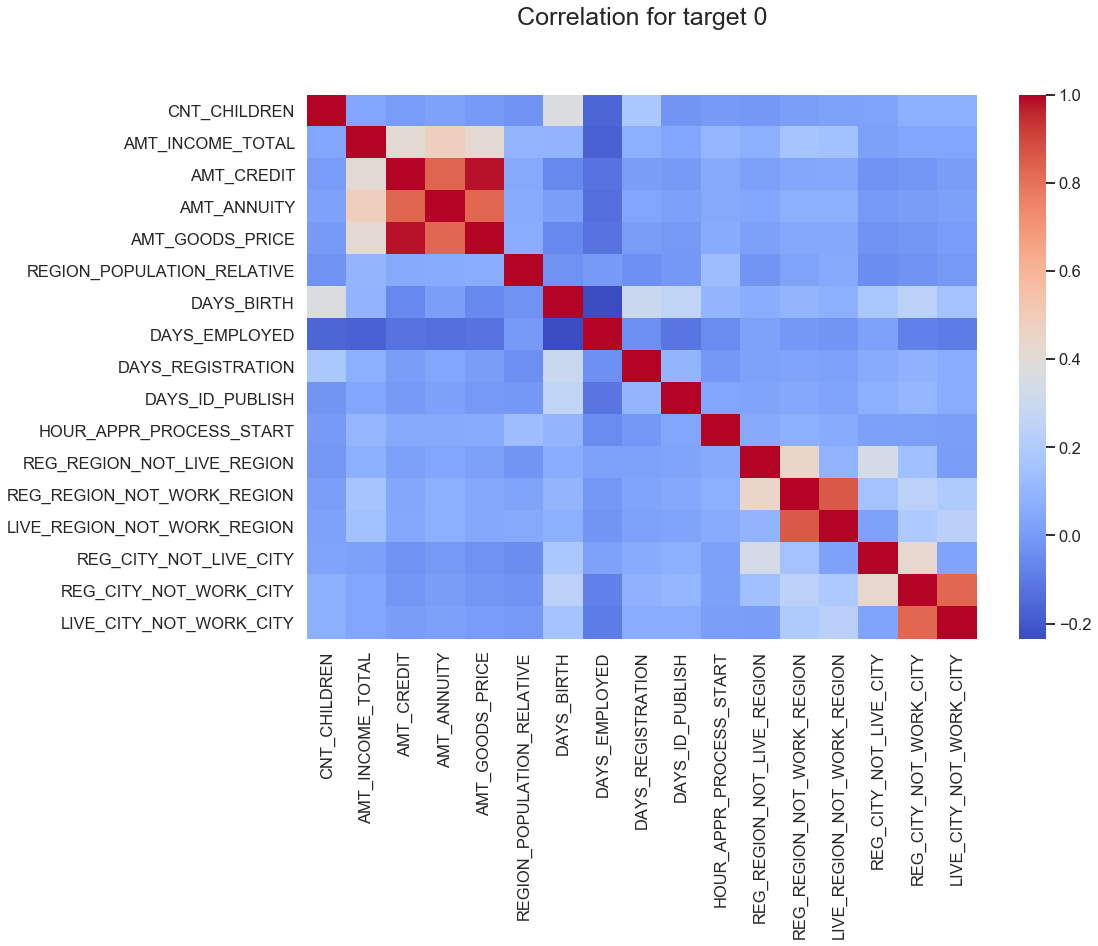

In [46]:
targets_corr(data=target0_corr,title='Correlation for target 0')

#### Observations
1. Credit amount is inversely proportional to the days of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children a client has which means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children the client has.
4. Clients with less children are more in densely populated area.
5. Credit amount is higher in densely populated area.
6. Income is also higher in densely populated area.

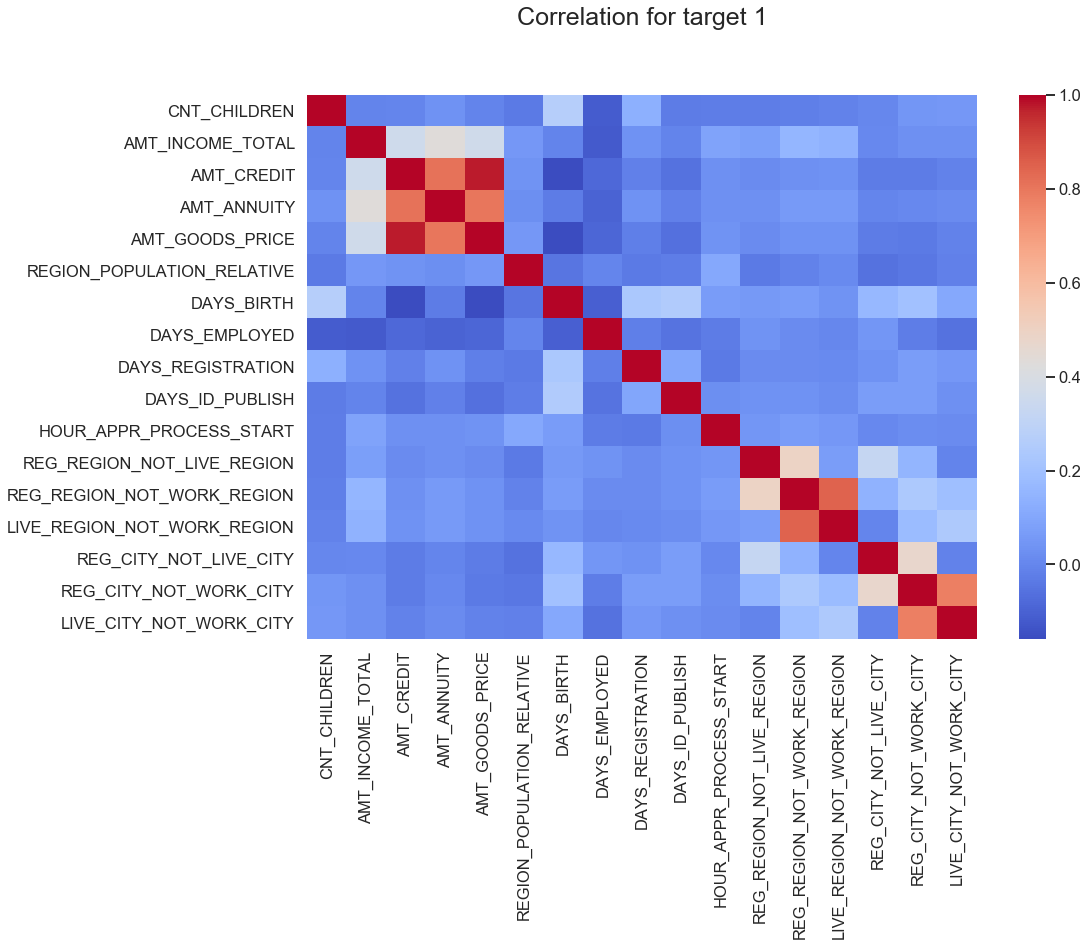

In [47]:
# For Target 1

targets_corr(data=target1_corr,title='Correlation for target 1')

#### Observations
1. Amount credit and amount goods price are directly proportional
2. The client's permanent address does not match with the contact address are having less children and vice-versa
3. The client's permanent address does not match work address are having less children and vice-versa

#### Univariate analysis on numerical columns


#### 1. For Target 0 - Finding any outliers

In [48]:

# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data = data, x=col,orient='v')
    plt.show()

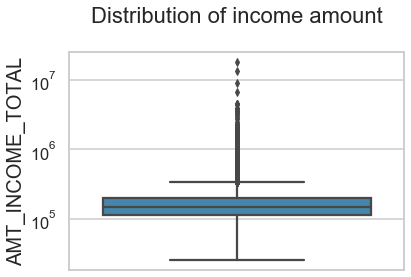

In [49]:
# Distribution of income amount

univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

#### Observations

1. Some outliers are noticed in income amount.
2. The third quartile range is very narrow.

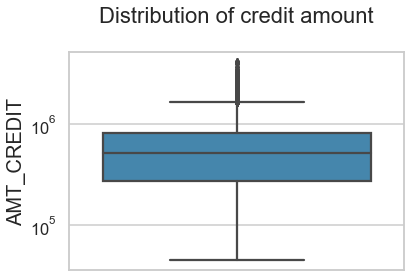

In [50]:
# Disrtibution of credit amount

univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount')

#### Observations
1. Some outliers are noticed in credit amount.
2. The first quartile area is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

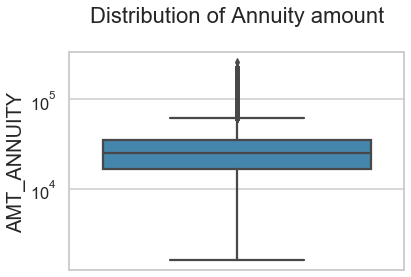

In [51]:
# Distribution of anuuity amount

univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

#### Observations
1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

#### 2. For Target 1 - Finding any outliers

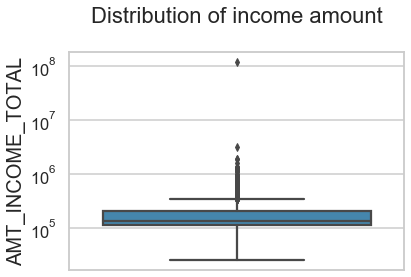

In [52]:
# Distribution of income amount

univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

#### Observations
1. Some outliers are noticed in income amount.
2. The third quartile is very narrow for income amount.
3. Most of the clients of income are present in first quartile.

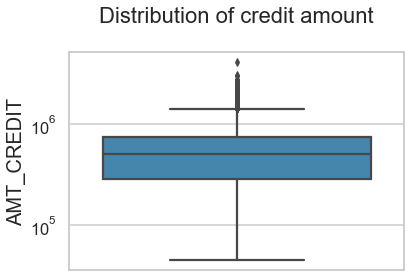

In [53]:
# Distribution of credit amount

univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of credit amount')

#### Observations
1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

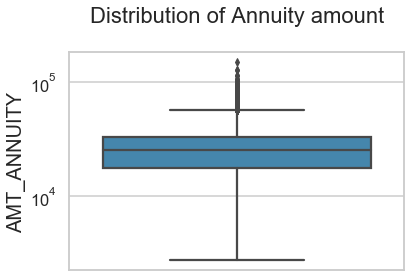

In [54]:
# Distribution of Annuity amount

univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

#### Observations
1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.


#### Bivariate analysis


#### 1. For Target 0

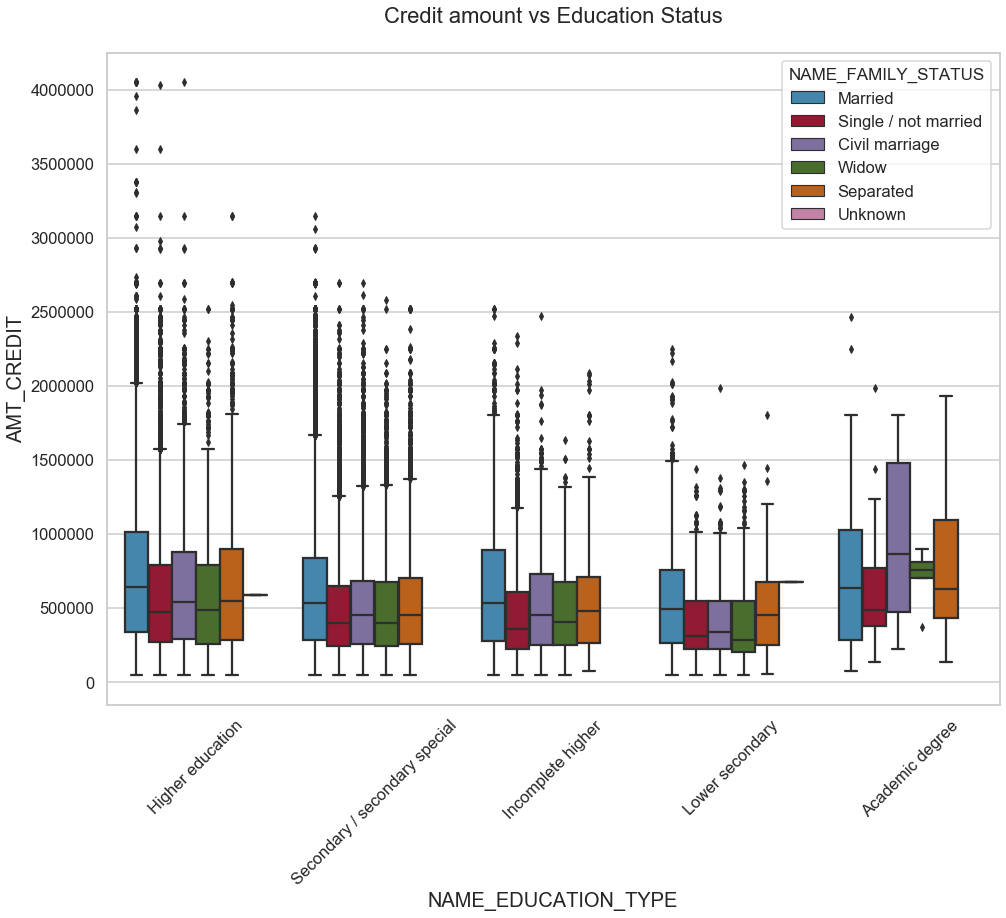

In [55]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### Observations
1. From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
2. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

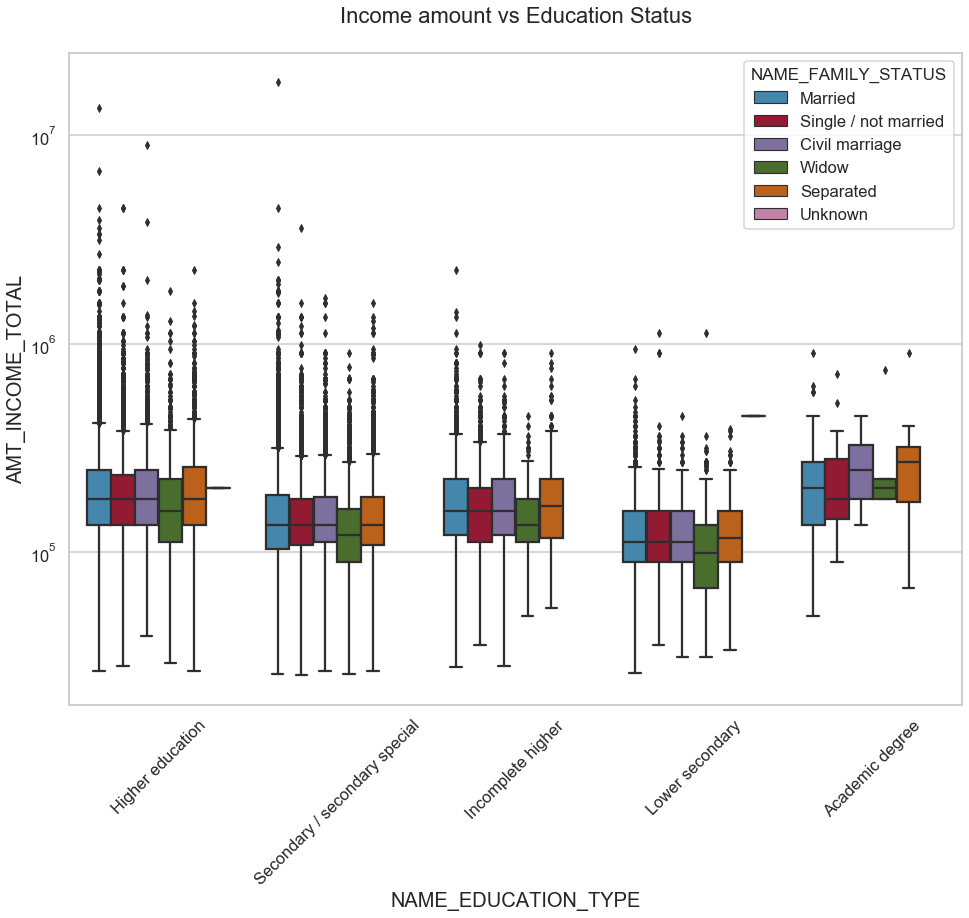

In [56]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Observations
1. From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers.
2. We see less outlier are present for Academic degree but the income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

#### For Target 1

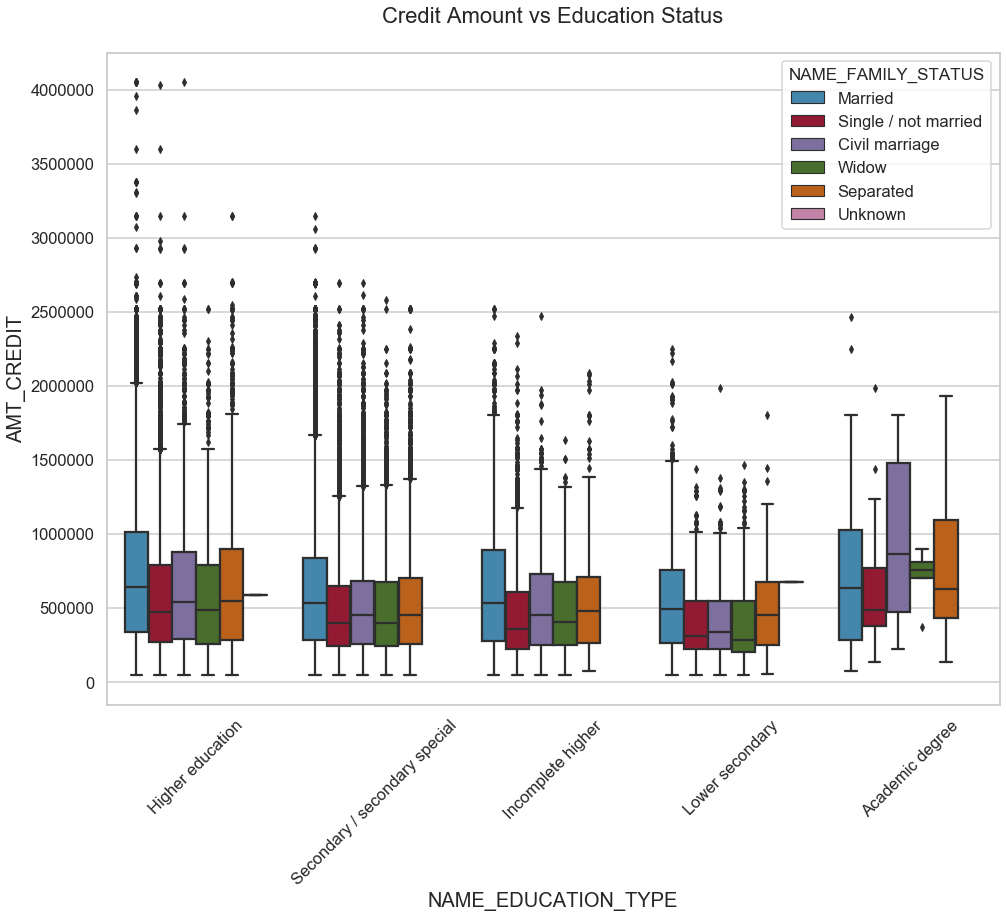

In [57]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

#### Observations
1. Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
2. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

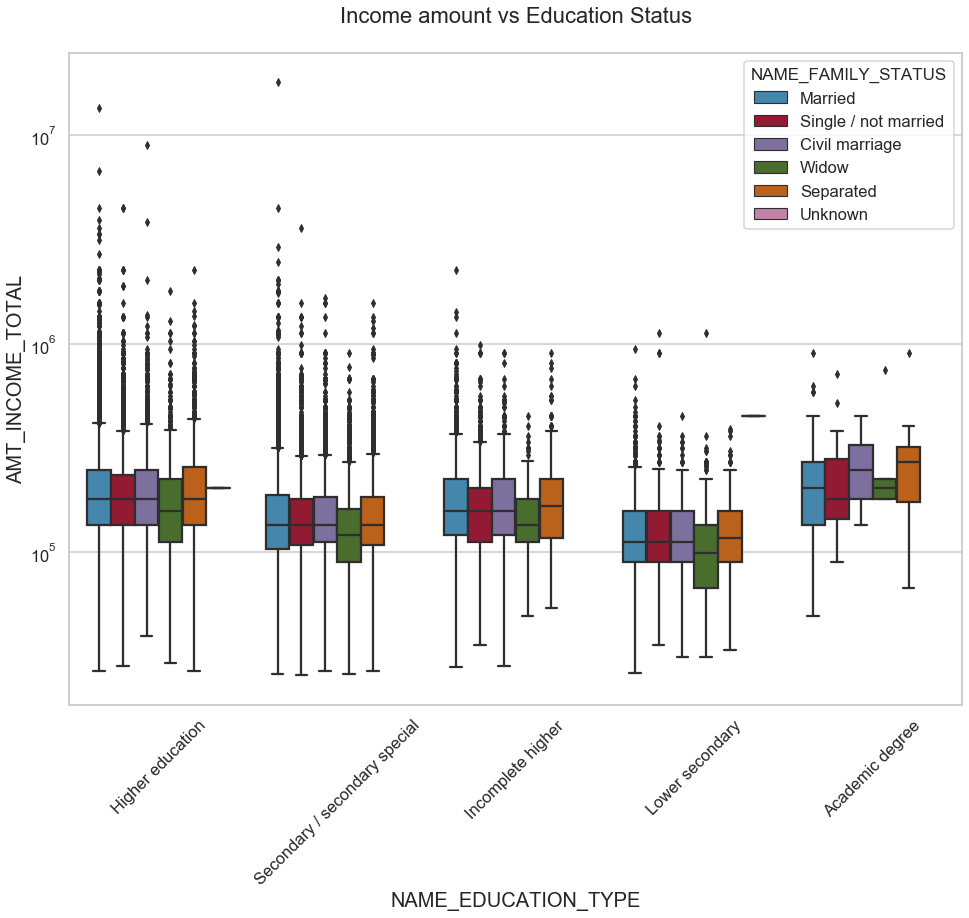

In [58]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Observations
1. Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status.
2. Less outlier are present for Academic degree but their income amount is little higher that Higher education. Lower secondary  has less income amount than others.

In [59]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=app,right=pre,how='inner',on='SK_ID_CURR',suffixes='_x')

In [60]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [61]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

#### Performing univariate analysis

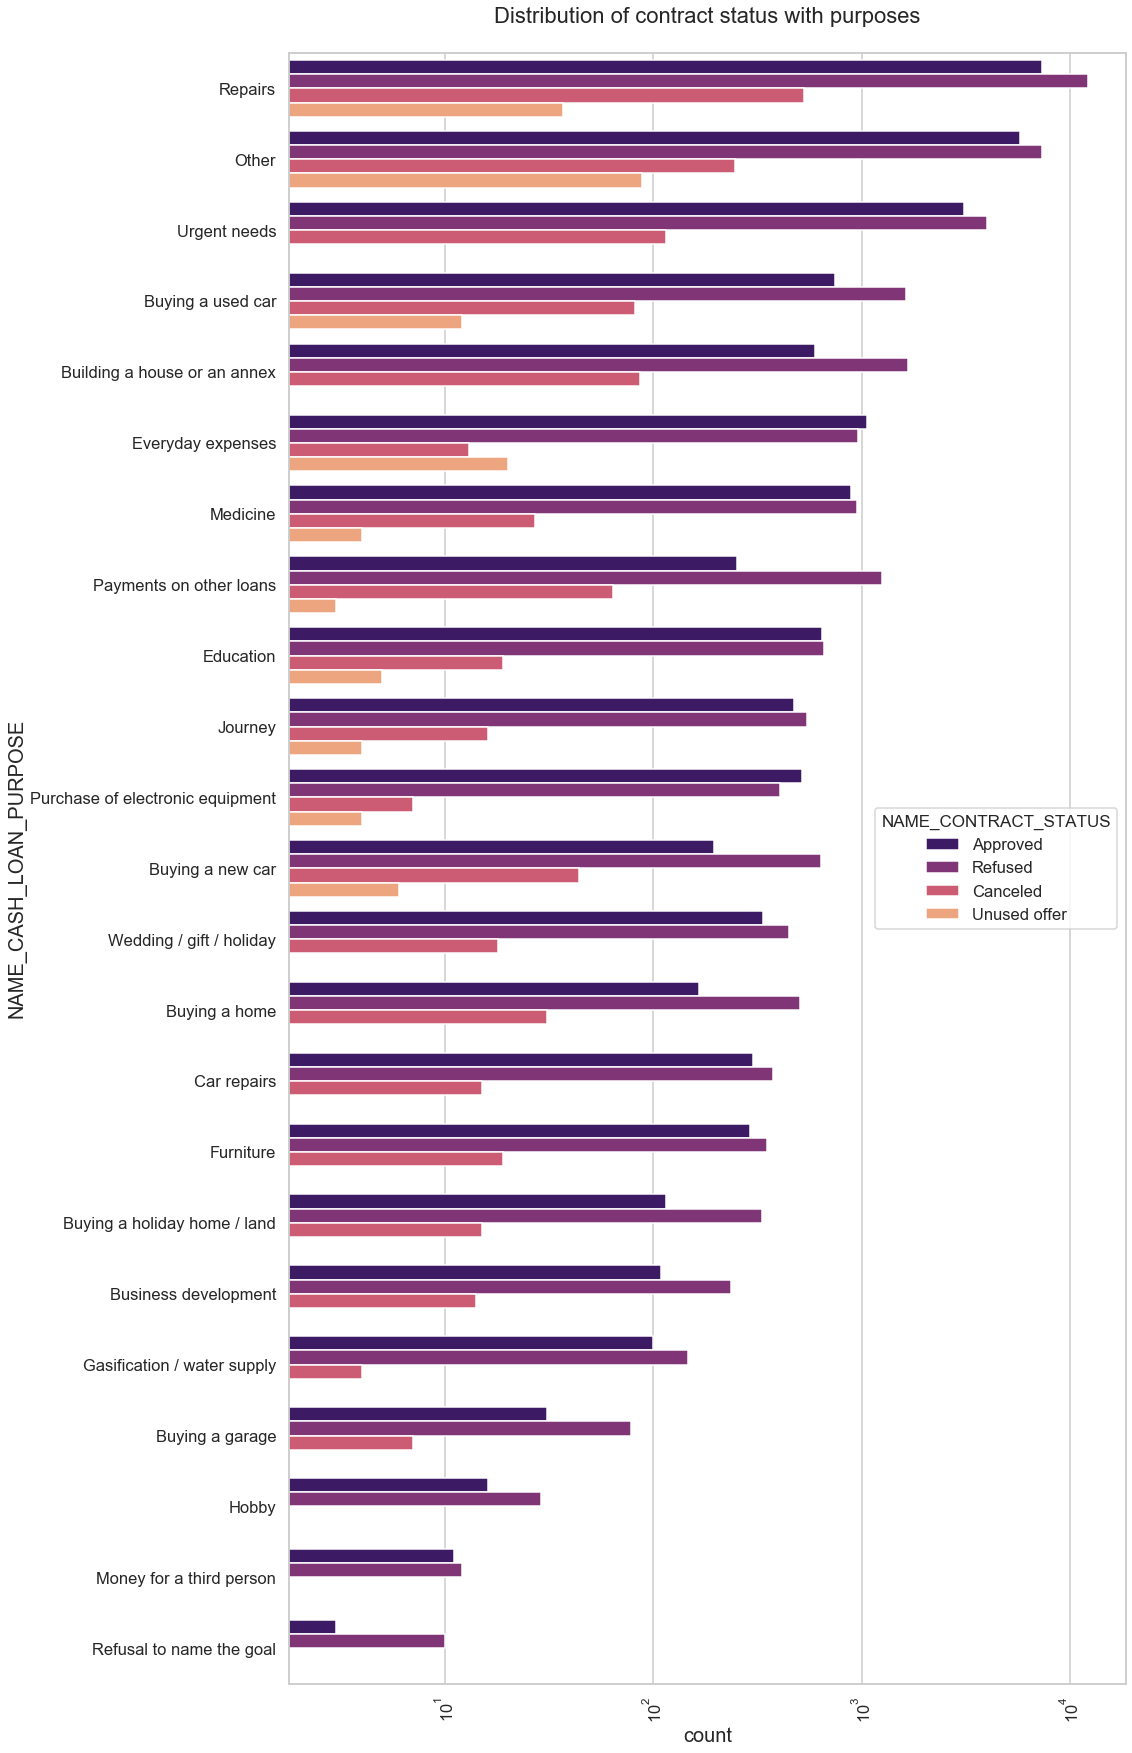

In [62]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')


### Observations 
1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Paying other loans and buying a new car is having significant higher rejection than approvals.

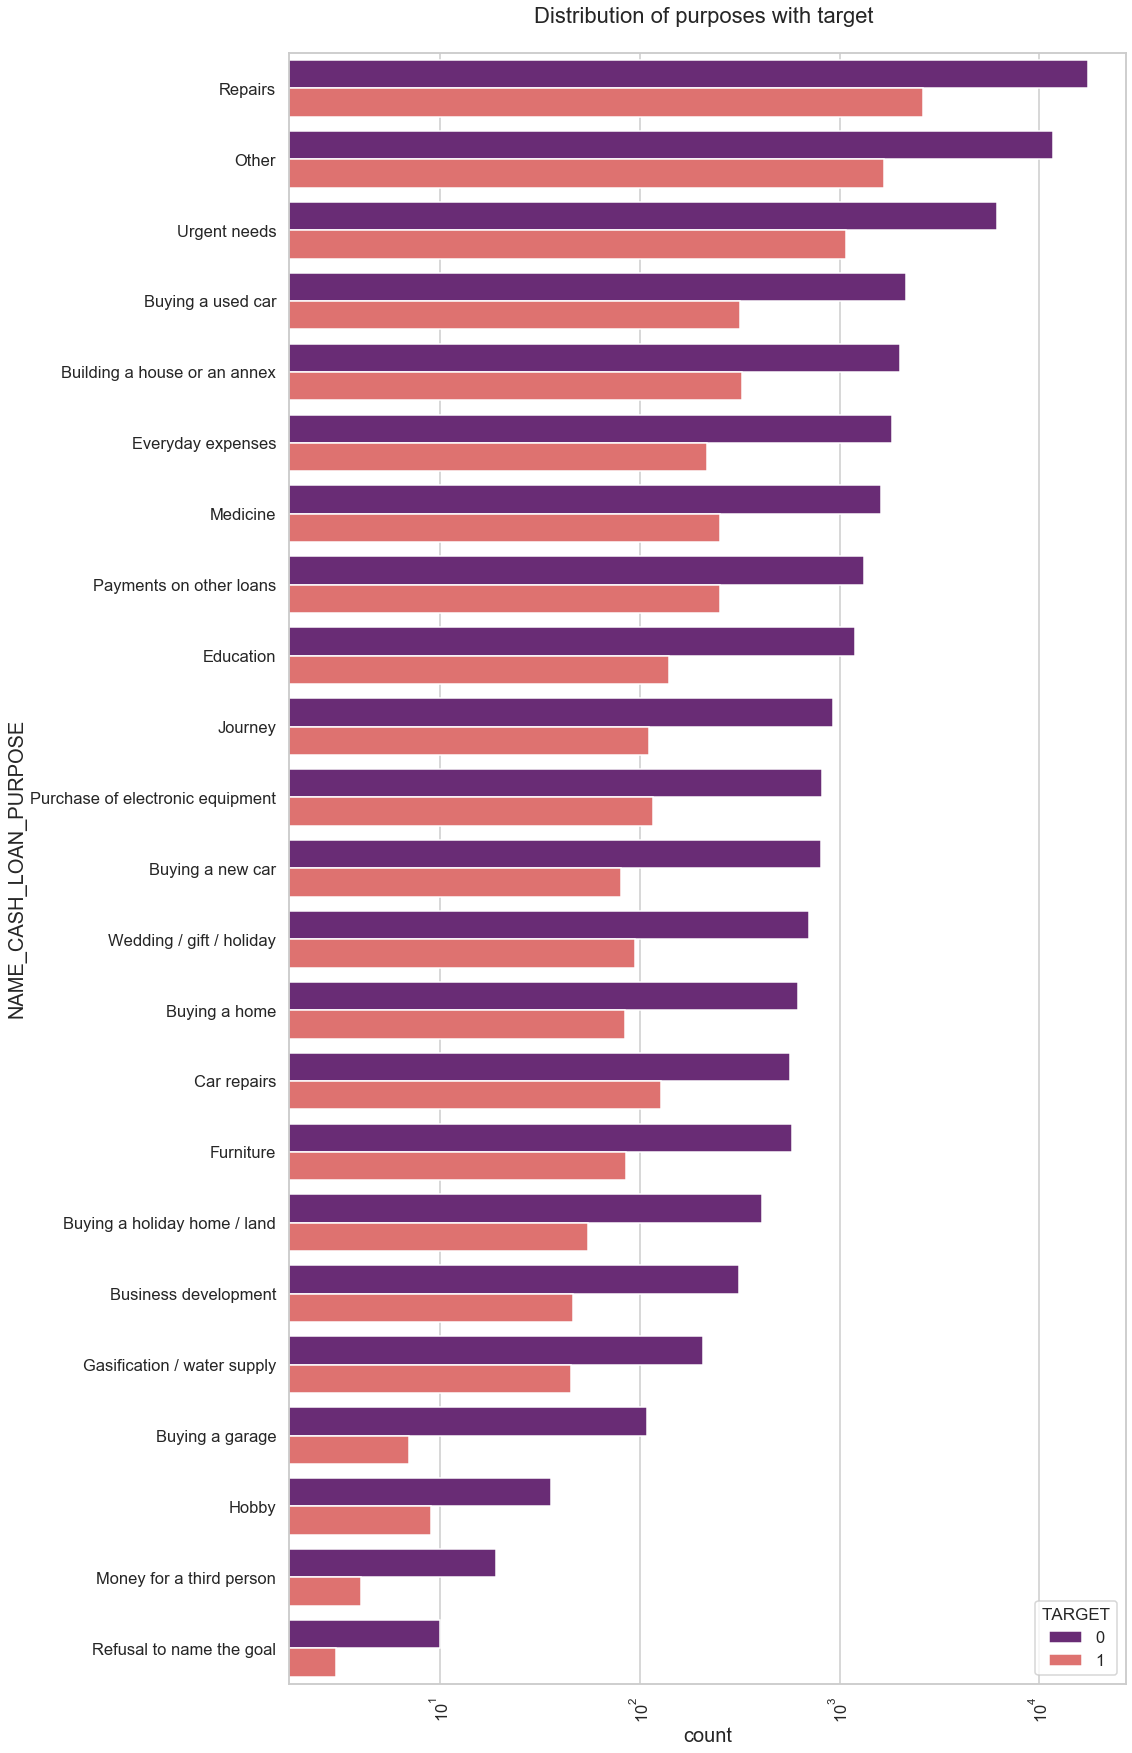

In [63]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

#### Observations
1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

#### Performing bivariate analysis


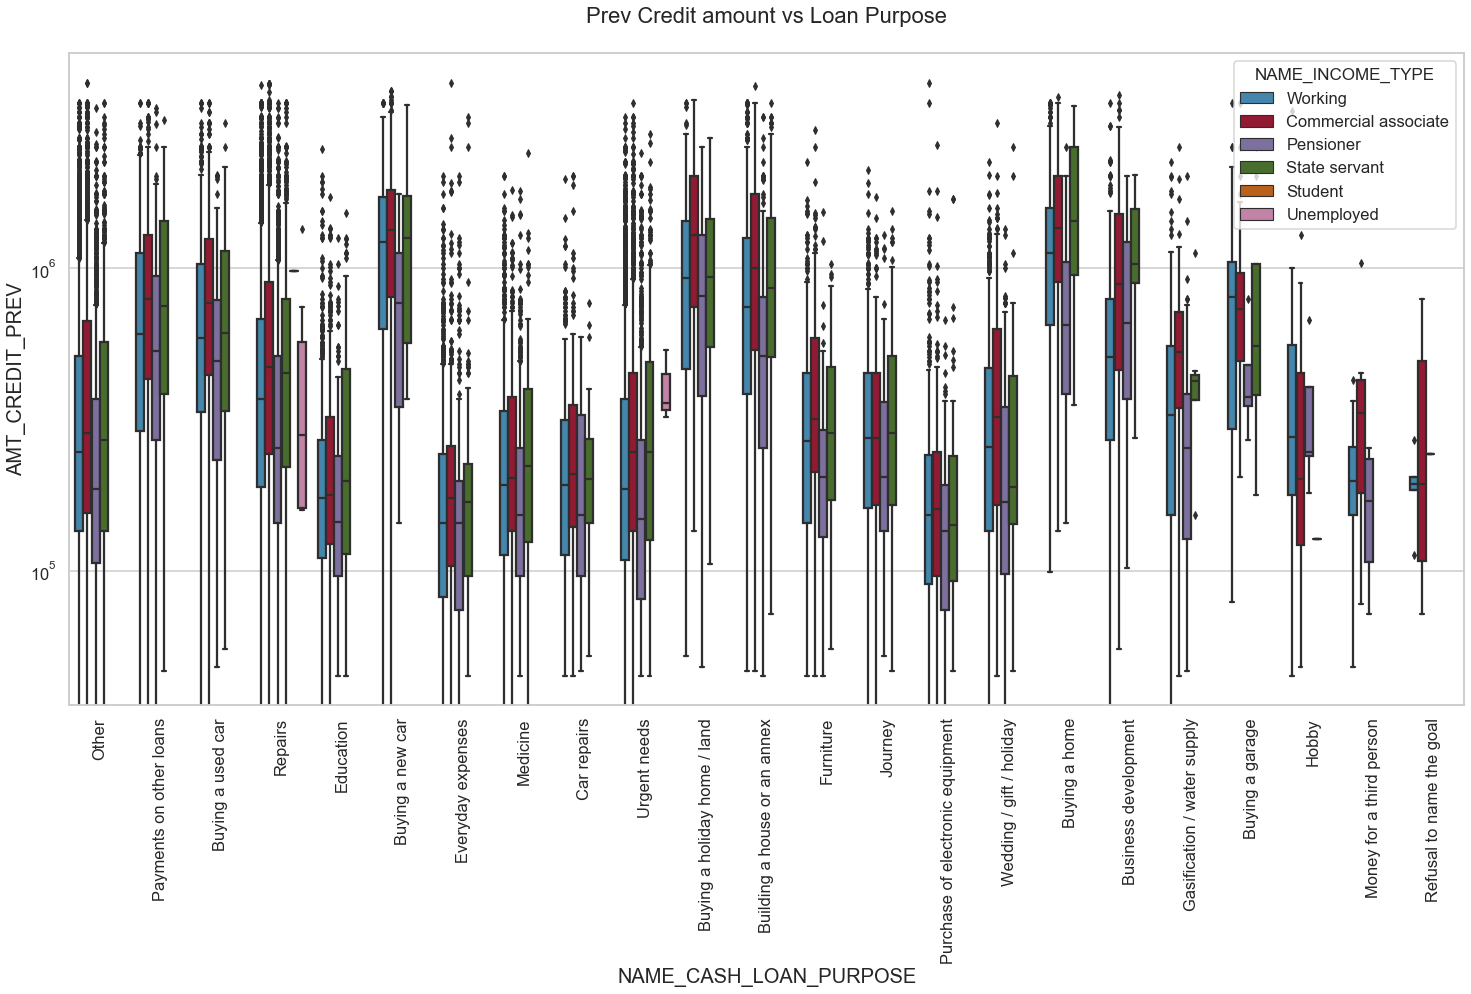

In [64]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(25,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

#### Observations
1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

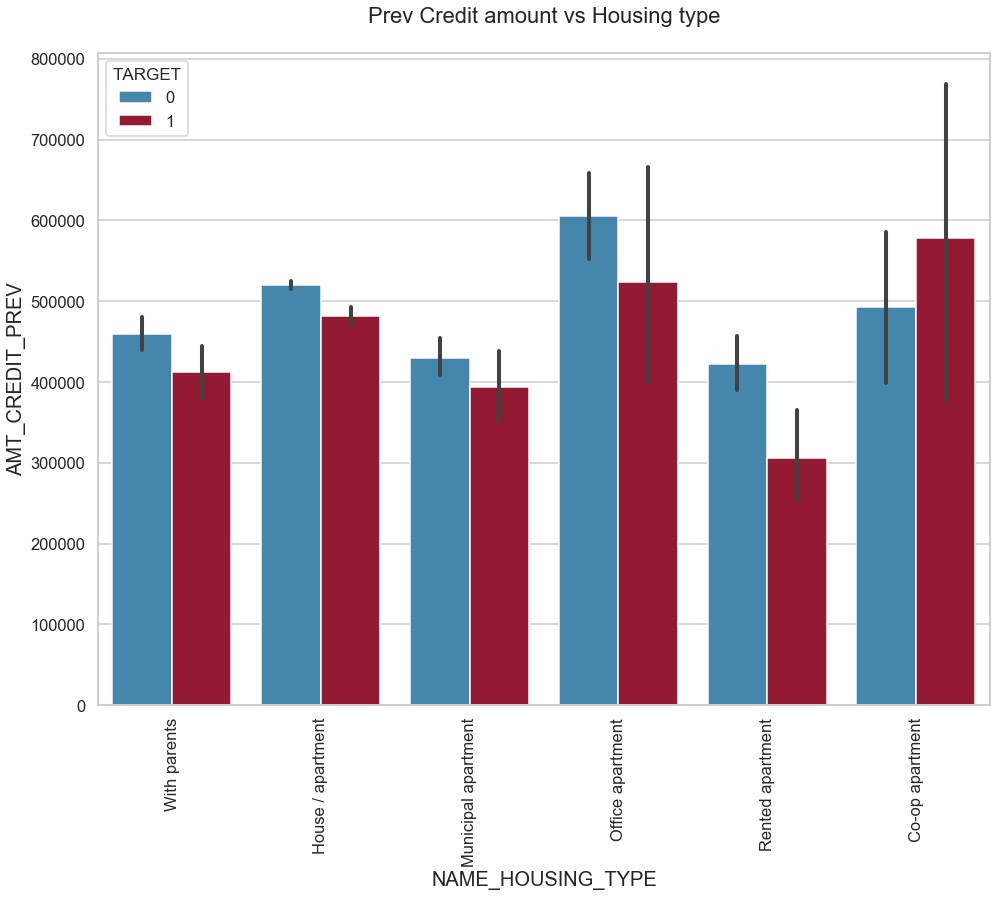

In [65]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

#### Observations
1. Housing type, office appartment are having higher credit of target 0 and co-op apartment is having higher credit of target. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. 
2. Bank can focus mostly on housing type with parents or House\appartment or municipal appartment for successful payments.

### CONCLUSION


1. Banks should focus on densely populated areas as they are less likely to be defaulted.

2. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

3. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

4. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

5. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.

